<a href="https://colab.research.google.com/github/tbradshaw91/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame. (DONE)
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).(DONE)
- Validate that you have no missing values.(DONE)
- Add informative names to the features.(DONE)
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)(DONE)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# Loading the data as a pandas data frame
import pandas as pd
import numpy as np

## **Attributes**
Age = Age

YOO = Year Of Operation

PAND = Positive Axillary Nodes Detected

SS = Survival Status

**Read in the dataset, assign names to features and verify it matches the DS**

In [19]:
patient_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', 
                           header=None, 
                          names=['Age', 'YOO', 'PAND', 'SS'])

patient_data.head()

# Validate appropriate number of observations
#patient_data.count()

,Age,YOO,PAND,SS
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Verify you have no missing values, this can be done in a couple of ways, which I have listed in hastags below. i chose to use my favorite method that just shows a sum of all missing values**

In [20]:
# Verify you have no missing values. 
#patient_data.isnull().sum()
#patient_data.isna().sum()

patient_data.isnull().sum().sum()

0

**Change the Variables and Print the First 5 Rows**

In [74]:
patient_data['SS']= np.where(patient_data['SS']==1,1,0)
# Confirm
patient_data.head()

,Age,YOO,PAND,SS
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

**Crosstabs & Summary Stats**

In [33]:
# Making Bins to see if there is any connections
yoo_bins = pd.cut(patient_data['YOO'], 10)  # 10 Bins
age_bins = pd.cut(patient_data['Age'], 10)  # 10 Bins
pand_bins = pd.cut(patient_data['PAND'], 10) # 10 Bins


ct = pd.crosstab(yoo_bins,[age_bins,patient_data['SS']],
                  rownames=['Year of Op'],colnames=['Age','Survived'])
ct.head()

Age            (29.947, 35.3]    (35.3, 40.6]    (40.6, 45.9]    (45.9, 51.2]  \
Survived                    0  1            0  1            0  1            0   
Year of Op                                                                      
(57.989, 59.1]              1  3            0  7            4  6            5   
(59.1, 60.2]                0  3            0  6            1  3            0   
(60.2, 61.3]                0  1            0  0            0  3            0   
(61.3, 62.4]                0  1            0  1            0  1            2   
(62.4, 63.5]                0  1            0  4            1  4            3   

Age               (51.2, 56.5]    (56.5, 61.8]    (61.8, 67.1]     \
Survived        1            0  1            0  1            0  1   
Year of Op                                                          
(57.989, 59.1]  6            3  6            1  6            4  6   
(59.1, 60.2]    2            2  7            0  2            1  0   
(60.2, 61.3]    7            0  2            1  5            2  5   
(61.3, 62.4]    4            1  4            3  1            1  2   
(62.4, 63.5]    4            2  3            0  2            1  2   

Age            (67.1, 72.4]    (72.4, 77.7]    (77.7, 83.0]     
Survived                  0  1            0  1            0  1  
Year of Op                                                      
(57.989, 59.1]            2  2            0  0            1  0  
(59.1, 60.2]              0  1            0  0            0  0  
(60.2, 61.3]              0  0            0  0            0  0  
(61.3, 62.4]              0  0            0  2            0  0  
(62.4, 63.5]              1  1            0  1            0  0

***I did not see any correlation between Year of operation and age/survival. To properly gauge this, I would need more info.***

In [36]:
ct = pd.crosstab(pand_bins,[age_bins,patient_data['SS']],
                  rownames=['Nodes'],colnames=['Age','Survived'])
ct.head()

Age           (29.947, 35.3]    (35.3, 40.6]     (40.6, 45.9]      \
Survived                   0  1            0   1            0   1   
Nodes                                                               
(-0.052, 5.2]              1  9            1  22            9  25   
(5.2, 10.4]                1  3            0   1            3   2   
(10.4, 15.6]               0  1            0   2            0   2   
(15.6, 20.8]               0  0            0   0            1   2   
(20.8, 26.0]               0  0            1   0            1   0   

Age           (45.9, 51.2]     (51.2, 56.5]     (56.5, 61.8]     (61.8, 67.1]  \
Survived                 0   1            0   1            0   1            0   
Nodes                                                                           
(-0.052, 5.2]            8  32            9  31            6  28            6   
(5.2, 10.4]              2   4            4   2            0   3            1   
(10.4, 15.6]             4   1            3   0            1   0            3   
(15.6, 20.8]             1   0            0   2            1   0            1   
(20.8, 26.0]             1   0            2   1            0   1            1   

Age               (67.1, 72.4]     (72.4, 77.7]    (77.7, 83.0]     
Survived        1            0   1            0  1            0  1  
Nodes                                                               
(-0.052, 5.2]  25            3  12            1  6            2  0  
(5.2, 10.4]     2            1   1            0  0            0  0  
(10.4, 15.6]    0            0   1            0  0            0  0  
(15.6, 20.8]    0            0   0            0  0            0  0  
(20.8, 26.0]    1            0   0            0  0            0  0

***I enjoyed this chart. It shows the relationship between age, survival and nodes. I felt like it showed a lot of insight, although a bit messy.***

In [37]:
ct.describe()

Age      (29.947, 35.3]            (35.3, 40.6]            (40.6, 45.9]  \
Survived              0          1            0          1            0   
count         10.000000  10.000000    10.000000  10.000000    10.000000   
mean           0.200000   1.400000     0.200000   2.500000     1.500000   
std            0.421637   2.836273     0.421637   6.883959     2.798809   
min            0.000000   0.000000     0.000000   0.000000     0.000000   
25%            0.000000   0.000000     0.000000   0.000000     0.000000   
50%            0.000000   0.000000     0.000000   0.000000     0.500000   
75%            0.000000   1.000000     0.000000   0.750000     1.000000   
max            1.000000   9.000000     1.000000  22.000000     9.000000   

Age                 (45.9, 51.2]            (51.2, 56.5]            \
Survived          1            0          1            0         1   
count     10.000000    10.000000  10.000000    10.000000  10.00000   
mean       3.100000     1.600000   3.700000     1.800000   3.70000   
std        7.752419     2.590581  10.022752     2.936362   9.62693   
min        0.000000     0.000000   0.000000     0.000000   0.00000   
25%        0.000000     0.000000   0.000000     0.000000   0.00000   
50%        0.000000     0.500000   0.000000     0.000000   0.50000   
75%        2.000000     1.750000   0.750000     2.750000   1.75000   
max       25.000000     8.000000  32.000000     9.000000  31.00000   

Age      (56.5, 61.8]            (61.8, 67.1]            (67.1, 72.4]  \
Survived            0          1            0          1            0   
count       10.000000  10.000000    10.000000  10.000000    10.000000   
mean         0.900000   3.200000     1.200000   2.900000     0.400000   
std          1.852926   8.766096     1.932184   7.795298     0.966092   
min          0.000000   0.000000     0.000000   0.000000     0.000000   
25%          0.000000   0.000000     0.000000   0.000000     0.000000   
50%          0.000000   0.000000     0.500000   0.000000     0.000000   
75%          1.000000   0.750000     1.000000   1.000000     0.000000   
max          6.000000  28.000000     6.000000  25.000000     3.000000   

Age                 (72.4, 77.7]            (77.7, 83.0]        
Survived          1            0          1            0     1  
count     10.000000    10.000000  10.000000    10.000000  10.0  
mean       1.400000     0.100000   0.600000     0.200000   0.0  
std        3.747592     0.316228   1.897367     0.632456   0.0  
min        0.000000     0.000000   0.000000     0.000000   0.0  
25%        0.000000     0.000000   0.000000     0.000000   0.0  
50%        0.000000     0.000000   0.000000     0.000000   0.0  
75%        0.750000     0.000000   0.000000     0.000000   0.0  
max       12.000000     1.000000   6.000000     2.000000   0.0

**Plots**

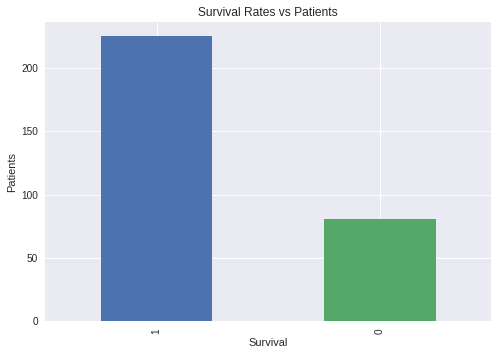

In [39]:
# Bar plot
patient_data['SS'].value_counts().plot(kind='bar')
plt.xlabel('Survival')
plt.ylabel('Patients')
plt.title('Survival Rates vs Patients')
plt.show()



***This plot does a great job representing the data. This one in particular shows the relationship between patients and survival. ***

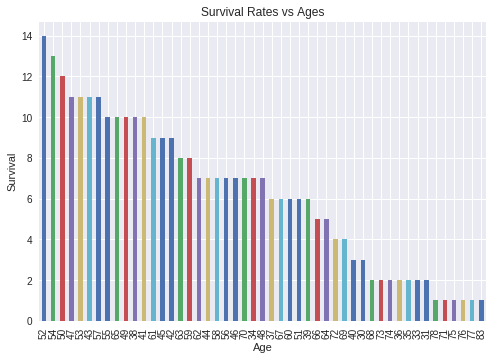

In [57]:
# Bar Plot #2
patient_data['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Survival')
plt.title('Survival Rates vs Ages')
plt.show()

***This is a bit cluttered on the X axis, could use some work with more time. ***

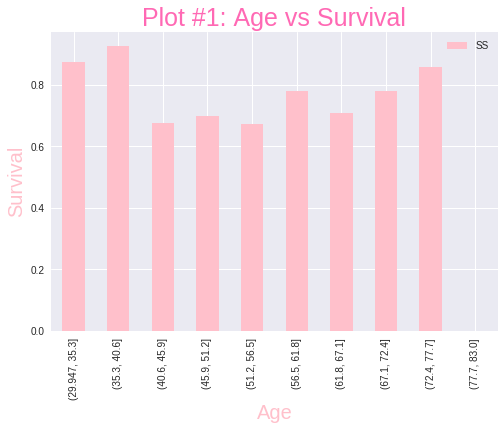

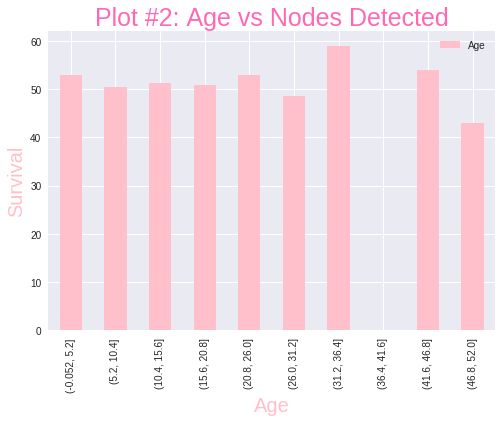

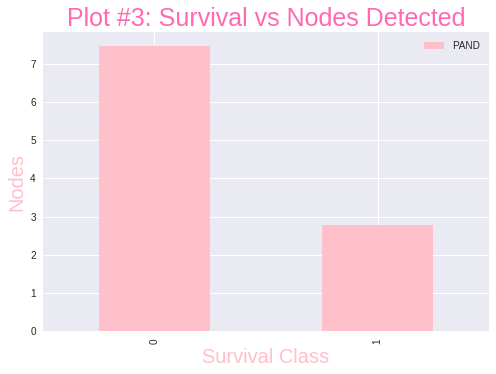

In [73]:
#Bar Plot Pink
pd.pivot_table(patient_data, values='SS', index=age_bins).plot.bar(color= 'pink'); 
plt.xlabel('Age', color='pink', size=20)
plt.ylabel('Survival', color='pink', size=20)
plt.title('Plot #1: Age vs Survival', color='hotpink', size=25);

pd.pivot_table(patient_data, values='Age', index=pand_bins).plot.bar(color= 'pink'); 
plt.xlabel('Age', color='pink', size=20)
plt.ylabel('Survival', color='pink', size=20)
plt.title('Plot #2: Age vs Nodes Detected', color='hotpink', size=25);

pd.pivot_table(patient_data, values='PAND', index='SS').plot.bar(color= 'pink'); 
plt.xlabel('Survival Class', color='pink', size=20)
plt.ylabel('Nodes', color='pink', size=20)
plt.title('Plot #3: Survival vs Nodes Detected', color='hotpink', size=25);



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
**Age appears to have a positive relationship with survival, the data reveals the younger you are, the higher your chance of survival. **

- What is at least one feature that looks to have a negative relationship with survival?
**Nodes detected appears to have a negative relationship with survival, with that being the most extreme. **

- How are those two features related with each other, and what might that mean?
**The more nodes that are detected, the lower the survival rate. That indicates that the longer the time of detection, the nodes increase which would lower your survival. **

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.